In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mlp-term-3-2025-kaggle-assignment-3/sample_submission.csv
/kaggle/input/mlp-term-3-2025-kaggle-assignment-3/train.csv
/kaggle/input/mlp-term-3-2025-kaggle-assignment-3/test.csv


In [147]:
import warnings
warnings.filterwarnings('ignore')



import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.impute  import SimpleImputer

from sklearn.preprocessing import StandardScaler,MinMaxScaler,FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV

from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import ComplementNB


from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier

from sklearn.svm import LinearSVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix




import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))


[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [347]:
data = pd.read_csv('/kaggle/input/mlp-term-3-2025-kaggle-assignment-3/train.csv')
test_data = pd.read_csv('/kaggle/input/mlp-term-3-2025-kaggle-assignment-3/test.csv')
sample_submission = pd.read_csv('/kaggle/input/mlp-term-3-2025-kaggle-assignment-3/sample_submission.csv')

print(data.head())
print('\n')
print(test_data.head())
print('\n')
print(sample_submission.shape)

   id                                             phrase  feature_1  \
0   0  It may as well be called `` Jar-Jar Binks : Th...       14.0   
1   1                               You have to see it .        6.0   
2   2  ... either you 're willing to go with this cla...       16.0   
3   3  Watching Harris ham it up while physically and...       37.0   
4   4  Pete 's screenplay manages to find that real n...       20.0   

   feature_2  feature_3  sentiment  
0        5.0        7.0          0  
1        1.0        NaN          2  
2        0.0        6.0          1  
3        NaN        3.0          1  
4        1.0        4.0          2  


   id                                             phrase  feature_1  \
0   0  One thing you have to give them credit for : T...        NaN   
1   1  Showtime 's starry cast could be both an asset...       13.0   
2   2  The result is good gossip , entertainingly del...       22.0   
3   3  A deft , delightful mix of sulky teen drama an...       14

<Axes: >

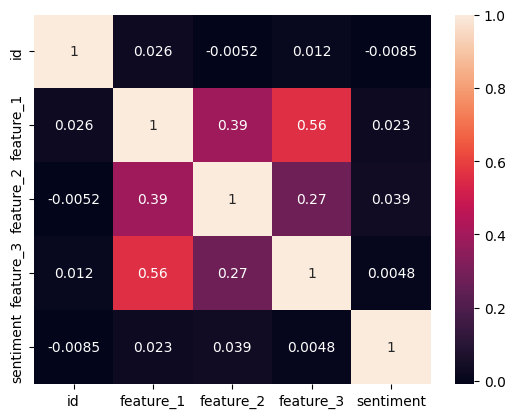

In [348]:
num_cols = data.select_dtypes(include = ['int','float'])
sns.heatmap(num_cols.corr(),annot = True)

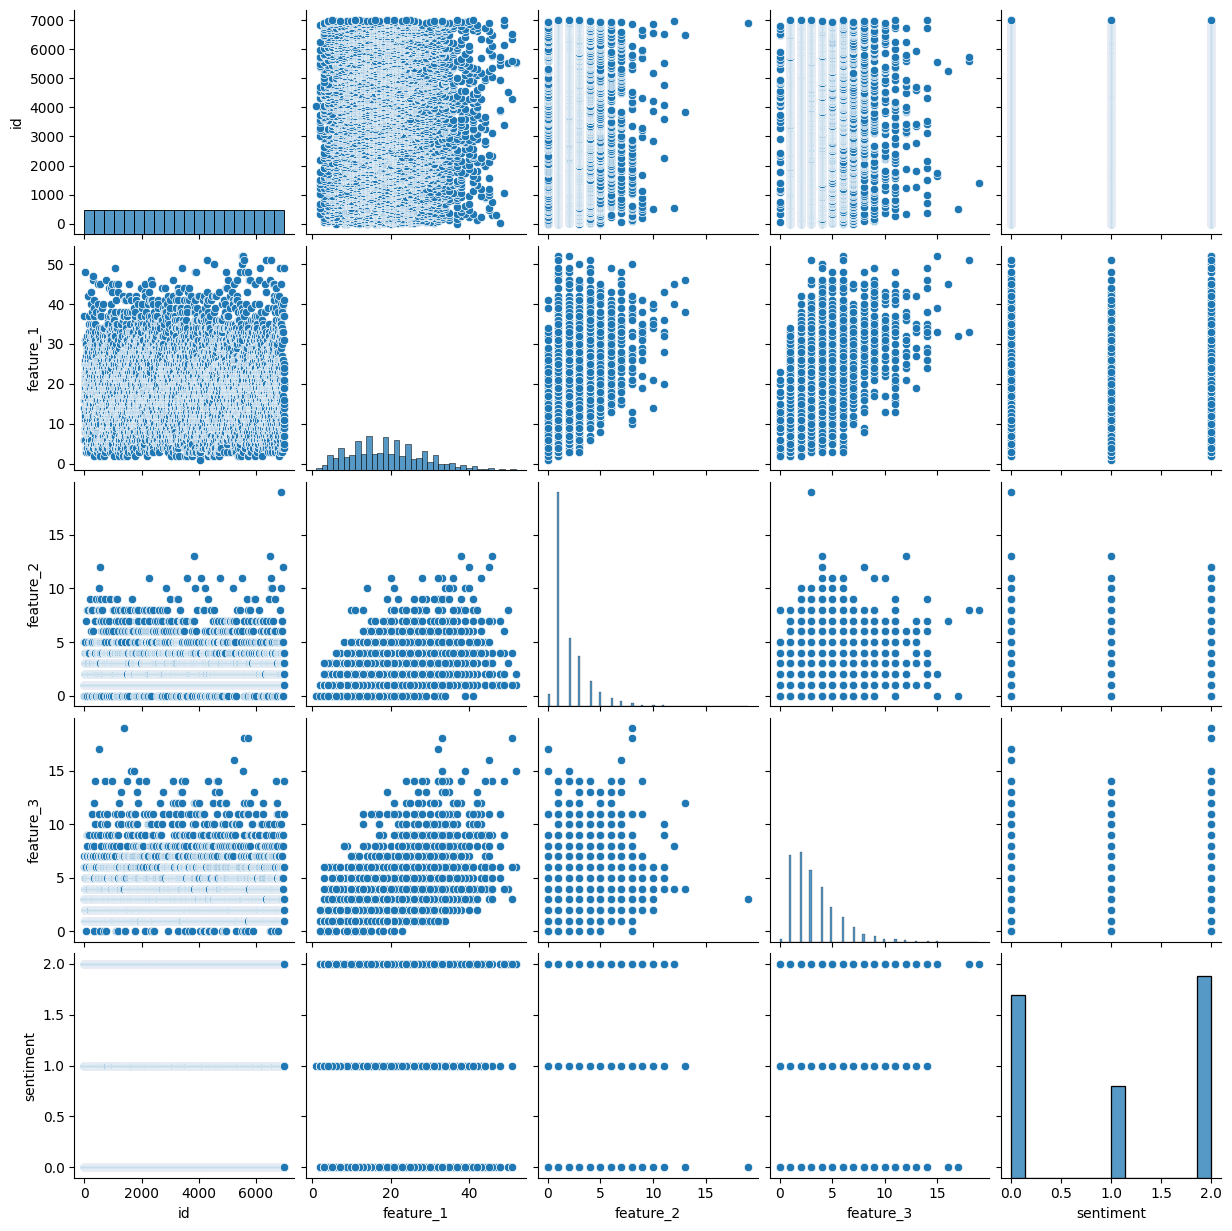

In [349]:
num_cols = data.select_dtypes(include = ['int','float'])

sns.pairplot(num_cols)
plt.show()

## As we can see here feature_1,feature_2,feature_3 is not that correlated with target variable

In [350]:
data.duplicated().sum()

0

In [368]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   7000 non-null   int64  
 1   phrase               7000 non-null   object 
 2   feature_1            6088 non-null   float64
 3   feature_2            5896 non-null   float64
 4   feature_3            5938 non-null   float64
 5   sentiment            7000 non-null   int64  
 6   review_length_chars  7000 non-null   int64  
 7   review_length_words  7000 non-null   float64
dtypes: float64(4), int64(3), object(1)
memory usage: 437.6+ KB


In [369]:
print(data.isna().sum())
print('\n')

print(test_data.isna().sum())

id                        0
phrase                    0
feature_1               912
feature_2              1104
feature_3              1062
sentiment                 0
review_length_chars       0
review_length_words       0
dtype: int64


phrase                   0
feature_1              222
feature_2              318
feature_3               90
review_length_chars      0
review_length_words      0
dtype: int64


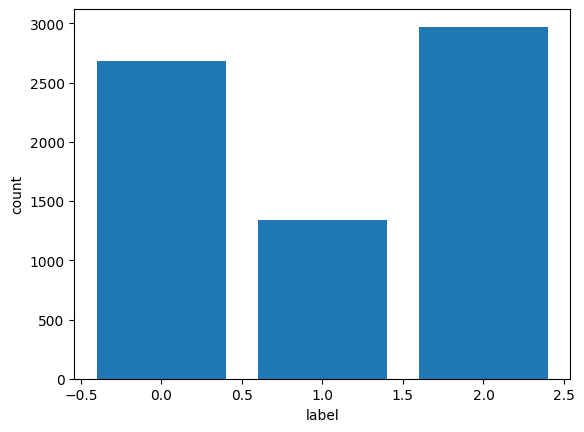

In [328]:
count = data['sentiment'].value_counts()
plt.bar(count.index,count.values)
plt.xlabel('label')
plt.ylabel('count')
plt.show()

In [329]:
print(data['phrase'].head(10).values)
print('\n')


["It may as well be called `` Jar-Jar Binks : The Movie . ''"
 'You have to see it .'
 "... either you 're willing to go with this claustrophobic concept or you 're not ."
 "Watching Harris ham it up while physically and emotionally disintegrating over the course of the movie has a certain poignancy in light of his recent death , but Boyd 's film offers little else of consequence ."
 "Pete 's screenplay manages to find that real natural , even-flowing tone that few movies are able to accomplish ."
 "If you 're looking for a story , do n't bother ."
 "Drowning 's too good for this sucker ."
 'A moving and stark reminder that the casualties of war reach much further than we imagine .'
 'A brutal and funny work .'
 'In some ways , Lagaan is quintessential Bollywood .']




In [366]:
data.isna().sum()

id                        0
phrase                    0
feature_1               912
feature_2              1104
feature_3              1062
sentiment                 0
review_length_chars       0
review_length_words       0
dtype: int64

In [367]:
test_data.isna().sum()

phrase                   0
feature_1              222
feature_2              318
feature_3               90
review_length_chars      0
review_length_words      0
dtype: int64

In [354]:
def add_text_length_features(df, text_col):
    df = df.copy()
    df[text_col] = df[text_col].astype(str)
    df["review_length_chars"] = df[text_col].apply(len)
    df["review_length_words"] = df[text_col].apply(lambda x: len(x.split()))
    return df
data = add_text_length_features(data, 'phrase')
test_data  = add_text_length_features(test_data, 'phrase')

In [355]:
def clean_phrase(text):
    text = str(text)
    text = text.lower()

    text = re.sub(r"\'re"," are",text)
    text = re.sub(r"\'s"," s",text)
    text = re.sub(r"\'t"," not",text)
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    text = re.sub(r'\S+@\S+', '', text)
    text = re.sub(r"[^\w\s']", '', text)
    text = re.sub(r'[^a-z\s]',' ',text)
    text = re.sub(r'\s+',' ',text).strip()
    return text

data['phrase'] = data['phrase'].apply(clean_phrase)
test_data['phrase'] = test_data['phrase'].apply(clean_phrase)

In [356]:
numeric_engineered = ["review_length_chars", "review_length_words"]
def detect_outliers_iqr(series):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return lower_bound, upper_bound

for col in numeric_engineered:
    lb, ub = detect_outliers_iqr(data[col])
    outliers = ((data[col] < lb) | (data[col] > ub)).sum()
    print(f"{col}: lower={lb:.2f}, upper={ub:.2f}, outliers={outliers}")

for col in numeric_engineered:
    lb, ub = detect_outliers_iqr(data[col])
    data[col] = np.clip(data[col], lb, ub)
    test_data[col]  = np.clip(test_data[col], lb, ub)

print("\nNumeric summary AFTER clipping engineered features (IQR bounds):")
display(data[numeric_engineered].describe())

review_length_chars: lower=-53.00, upper=251.00, outliers=26
review_length_words: lower=-7.50, upper=44.50, outliers=51

Numeric summary AFTER clipping engineered features (IQR bounds):


,review_length_chars,review_length_words
count,7000.000000,7000.000000
mean,102.018000,19.004786
std,51.631402,9.253889
min,4.000000,1.000000
25%,61.000000,12.000000
50%,97.000000,18.000000
75%,137.000000,25.000000
max,251.000000,44.500000


In [357]:
x = data.drop(['id','sentiment'],axis = 1).copy()
test_data = test_data.drop('id',axis = 1).copy()
y = data['sentiment'].copy()

x_train,x_test,y_train,y_test = train_test_split(x,y,stratify = y,test_size = 0.2,random_state = 42)

In [370]:
x_train.isna().sum()

phrase                   0
feature_1              740
feature_2              891
feature_3              849
review_length_chars      0
review_length_words      0
dtype: int64

In [396]:
text_features = 'phrase'
num_features = ['feature_1','feature_2','feature_3','review_length_chars','review_length_words']
test_transformer = Pipeline(steps = [('tfidf',TfidfVectorizer(stop_words = 'english',
                                                              max_features = 50000,
                                                              smooth_idf = True,
                                                             lowercase = True,
                                                             token_pattern=r'(?u)\b[a-zA-Z]{3,}\b',
                                                             ngram_range = (1,2)))])

num_transformer = Pipeline(steps = [('imputer',SimpleImputer(strategy = 'median')),
                                    ('scaler',StandardScaler())])

preprocessor = ColumnTransformer(transformers = [('text',test_transformer,text_features),
                                                ('num',num_transformer,num_features)],
                                remainder = 'drop',
                                sparse_threshold =0)



x_train_tr = preprocessor.fit_transform(x_train)
x_test_tr = preprocessor.transform(x_test)
test = preprocessor.transform(test_data)


In [397]:
x_train_tr.shape

(5600, 50005)

In [398]:
Accuracy_frame = dict()

# LogisticRegression

In [361]:

log_reg_pipeline = Pipeline([('logistic_regression',
                              LogisticRegression(max_iter=1000,
                                                 random_state=42,
                                                 penalty='l2'))])


log_reg_pipeline.fit(x_train_tr, y_train)

y_test_pred = log_reg_pipeline.predict(x_test_tr)

score = accuracy_score(y_test, y_test_pred)
Accuracy_frame['LogisticRegression'] = score
print(score)

0.6185714285714285


# RandomForestClassifier

In [384]:
rfc_pipeline = Pipeline([('random_forest',
                          RandomForestClassifier(n_estimators=150,
                                                 max_depth=25,
                                                 min_samples_leaf=5,
                                                 random_state=42))])

rfc_pipeline.fit(x_train_tr, y_train)
y_test_pred = rfc_pipeline.predict(x_test_tr)
score = accuracy_score(y_test, y_test_pred)
Accuracy_frame['RandomForestClassifier'] = score
print(score)

0.5278571428571428


# SVC

In [392]:
svc_pipeline = Pipeline([('linear_svc', LinearSVC(max_iter=10000,
                                                  C=0.5,
                                                  random_state=42))])

svc_pipeline.fit(x_train_tr, y_train)
y_test_pred = svc_pipeline.predict(x_test_tr)
score = accuracy_score(y_test, y_test_pred)
Accuracy_frame['LinearSVC'] = score
print(score)

0.6064285714285714


# SGDClassifier

In [283]:

sgdc_pipeline = Pipeline([('sgd_classifier',
                           SGDClassifier(max_iter=5000,
                                         tol=1e-3))])

sgdc_pipeline.fit(x_train_tr, y_train)
y_test_pred = sgdc_pipeline.predict(x_test_tr)
score = accuracy_score(y_test, y_test_pred)
Accuracy_frame['SGDClassifier'] = score
print(score)


0.6121428571428571


# GaussianNB

In [285]:
gnb_pipeline = Pipeline([('gaussian_nb', GaussianNB())])

gnb_pipeline.fit(x_train_tr, y_train)
y_test_pred = gnb_pipeline.predict(x_test_tr)
score = accuracy_score(y_test, y_test_pred)
Accuracy_frame['GaussianNB'] = score
print(score)

0.48714285714285716


# Predictiion with bayes models

In [286]:
x_train.head()

,phrase,feature_1,feature_2,feature_3
6784,it s sort of a st century morality play with a...,NaN,2.0,2.0
4697,unfortunately the experience of actually watch...,19.0,1.0,2.0
1652,suffice to say that after seeing this movie in...,31.0,4.0,4.0
939,about as exciting to watch as two lastplace ba...,22.0,0.0,5.0
2901,this is not a retread of dead poets society,13.0,5.0,6.0


In [287]:
x_train_bayes = x_train.drop(['feature_1','feature_2','feature_3'],axis = 1)
x_test_bayes = x_test.drop(['feature_1','feature_2','feature_3'],axis = 1)

In [288]:
text_features = 'phrase'

test_transformer = Pipeline(steps = [('tfidf',TfidfVectorizer(stop_words = 'english',
                                                              smooth_idf = True,
                                                              max_features = 50000,
                                                             lowercase = True,
                                                             token_pattern=r'(?u)\b[a-zA-Z]{3,}\b',
                                                             ngram_range = (1,2)))])
NB_preprocessor = ColumnTransformer(transformers = [('text',test_transformer,text_features)],
                                remainder = 'drop',
                                sparse_threshold =0)




NB_x_train = NB_preprocessor.fit_transform(x_train_bayes)
NB_x_test = NB_preprocessor.transform(x_test_bayes)

# MultinomialNB

In [289]:
mnb_pipeline = Pipeline([('multinomial_nb', MultinomialNB(alpha=0.7))])

mnb_pipeline.fit(NB_x_train, y_train)
y_test_pred = mnb_pipeline.predict(NB_x_test)
score = accuracy_score(y_test, y_test_pred)
Accuracy_frame['MultinomialNB'] = score
print(score)

0.62


# ComplementNB

In [290]:
cnb_pipeline = Pipeline([('complement_nb', ComplementNB(alpha=0.7))])

cnb_pipeline.fit(NB_x_train, y_train)
y_test_pred = cnb_pipeline.predict(NB_x_test)
score = accuracy_score(y_test, y_test_pred)
Accuracy_frame['ComplementNB'] = score
print(score)

0.625


# Comparison of Models

In [291]:
mod_comp = pd.DataFrame(list(Accuracy_frame.items()),columns = ['models','accuracy'])
mod_comp.sort_values(by = 'accuracy',ascending = False)

,models,accuracy
2,LinearSVC,0.630000
0,LogisticRegression,0.629286
7,ComplementNB,0.625000
6,MultinomialNB,0.620000
3,SGDClassifier,0.612143
4,XGBClassifier,0.550000
1,RandomForestClassifier,0.535000
5,GaussianNB,0.487143


# Hyperparameter Tunning

In [380]:
x_train_tr.shape

(5600, 50005)

In [414]:
svc_pipe = Pipeline(steps = [('preprocessor',preprocessor),
                            ('linear_svc',LinearSVC(max_iter = 10000,random_state = 42))])

param_grid = {
              'preprocessor__text__tfidf__max_features':[20000,30000,50000],
              'preprocessor__text__tfidf__min_df' : [1,2],
              'preprocessor__text__tfidf__max_df':[0.7,0.8,0.9],
              'linear_svc__C':[0.25, 0.5, 1.0, 2.0, 4.0]
             }

grid = GridSearchCV(svc_pipe,param_grid,cv = 3,scoring = 'accuracy',n_jobs = -1,verbose = 1)

grid.fit(x_train,y_train)

print(f"Best parameters: {grid.best_params_}")
print(f"Best CV score: {grid.best_score_}")
model_1  = grid.best_estimator_

y_test_pred = model_1.predict(x_test)
score = accuracy_score(y_test, y_test_pred)
print(score)


Fitting 3 folds for each of 90 candidates, totalling 270 fits
Best parameters: {'linear_svc__C': 0.5, 'preprocessor__text__tfidf__max_df': 0.7, 'preprocessor__text__tfidf__max_features': 50000, 'preprocessor__text__tfidf__min_df': 1}
Best CV score: 0.6055348598942961
0.6235714285714286


In [421]:
log_reg_pipe = Pipeline(steps=[('preprocessor', preprocessor),
                                ('logistic_regression', LogisticRegression(max_iter=1000, random_state=42))])

param_grid = {
    'preprocessor__text__tfidf__max_features': [20000, 30000, 50000],
    'preprocessor__text__tfidf__min_df': [1, 2],
    'preprocessor__text__tfidf__max_df': [0.7, 0.8, 0.9],
    'logistic_regression__C': [0.1, 0.5, 1.0],
    'logistic_regression__penalty': ['l2','l1']
}

grid = GridSearchCV(log_reg_pipe, param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=1)
grid.fit(x_train, y_train)
    
print(f"Best parameters: {grid.best_params_}")
print(f"Best CV score: {grid.best_score_}")
model_2  = grid.best_estimator_

y_test_pred = model_2.predict(x_test)
score = accuracy_score(y_test, y_test_pred)
print(score)

In [422]:
mnb_pipe = Pipeline([
    ('preprocessor', NB_preprocessor),
    ('multinomial_nb', MultinomialNB())
])

param_grid = {
    'preprocessor__text__tfidf__ngram_range': [(1, 1), (1, 2)],
    'preprocessor__text__tfidf__max_features': [30000, 50000],
    'preprocessor__text__tfidf__min_df': [1, 2],
    'preprocessor__text__tfidf__max_df': [0.8, 0.9],
    'multinomial_nb__alpha': [0.1, 0.5, 0.7, 1.0]
}

grid = GridSearchCV(mnb_pipe, param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=1)
grid.fit(x_train, y_train)

print(f"Best parameters: {grid.best_params_}")
print(f"Best CV score: {grid.best_score_}")
model_3  = grid.best_estimator_

y_test_pred = model_3.predict(x_test)
score = accuracy_score(y_test, y_test_pred)
print(score)

In [415]:
y_pred = model_1.predict(test_data)
sample_submission['sentiment'] = y_pred
sample_submission.to_csv('submission.csv', index=False)

In [416]:
sample_submission.head()

,id,sentiment
0,0,0
1,1,2
2,2,0
3,3,2
4,4,1
